<a href="https://colab.research.google.com/github/labrador208/Cryostat/blob/main/CryostatIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import random
random.seed(5)

#Change temp as necessary
temp=0.1
temp=300

In [ ]:
#i=0.00181692

#Set i to be the lower bound of integration. Determines spectral radiance at that point
i=0.00005
#temp=0.1
Etop=2*(6.63e-34)*((3e8)*(3e8))
exponentTerm3=(6.63*math.pow(10,-34)*3.00*math.pow(10,8))/(i*1.3805*math.pow(10,-23)*temp)
Ebot=(i**5)*(np.exp(exponentTerm3)-1)
E1=Etop/Ebot
print(temp)
print(E1)

300
236747.70086411395


In [ ]:
#i=0.00239834

#Set i to be upper bound of integration
i=1
#temp=300
Etop=2*(6.63e-34)*((3e8)*(3e8))
exponentTerm3=(6.63*math.pow(10,-34)*3.00*math.pow(10,8))/(i*1.3805*math.pow(10,-23)*temp)
Ebot=(i**5)*(np.exp(exponentTerm3)-1)
E2=Etop/Ebot
print(temp)
print(E2)

300
2.4848403304829456e-12


Main integration function. Uses Monte Carlo integration to integrate functions for different ranges. Much of the code is used specifically for integrating Planck's law but can be easily modified for other functions.

In [1]:
#xUpperBound=(3.00*math.pow(10,8))/(1.25*(10**11))
#xLowerBound=(3.00*math.pow(10,8))/(1.65*(10**11))
#xUpperBound=0.002398339664
#xLowerBound=0.001816923987879

#Set these values to be the bounds of integration. Determines the range of potential x-coordinates
xLowerBound=0.00005
xUpperBound=1


#Determines the maximum value of y-coordinates. Set manually if necessary
if E1>E2:
  yMax=E1*1.5
else:
  yMax=E2*1.5

count=0.0
x=0.0

#Etop, exponentTerm3, and Ebot are variables used to set the function. Delete or modify them as necessary for other functions
Etop=2*(6.63e-34)*((3e8)*(3e8))


xCoordIn=[]
yCoordIn=[]
xCoordOut=[]
yCoordOut=[]

#Set the value as high as necessary. Higher values creates a greater degree of accuracy
while x<100000000:
  #Generates two random numbers using the bounds determined above. The random numbers will be x and y coordinates
  xCoord=random.uniform(xLowerBound, xUpperBound)
  yCoord=random.uniform(0,yMax)
  
  
  exponentTerm3=(6.63*math.pow(10,-34)*3.00*math.pow(10,8))/(xCoord*1.3805*math.pow(10,-23)*temp)
  Ebot=(xCoord**5)*(np.exp(exponentTerm3)-1)
  
  functionValue=Etop/Ebot
  
  
  x=x+1
  #print(xCoord, yCoord, functionValue)
  
  #The if statement compares the x and y coordinates generated to the points on the function curve. If they are below the curve they will be "counted".
  if yCoord<=functionValue:
    count=count+1
    #print(xCoord, yCoord, functionValue)

    #print (count)
    #print (x)
    xCoordIn.append(xCoord)
    yCoordIn.append(yCoord)
  else:
    xCoordOut.append(xCoord)
    yCoordOut.append(yCoord)

#Calculates how many "counts" have been counted relative to the total number of sets of coordinates generated. Then multiplies this ratio by the total area of integration to output the integrated value.
ratio=count/x
result=(xUpperBound-xLowerBound)*(yMax)*ratio
print ("Total emissive power (W/m^2)", result)

NameError: ignored

4.758390855929322 W/m^2


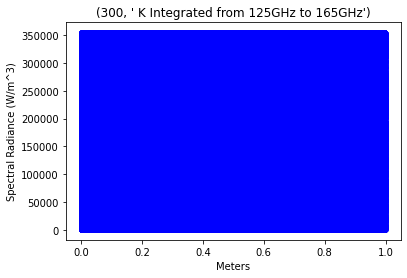

In [ ]:

#Use this to ensure the function has been properly entered and integrated
plt.plot(xCoordIn,yCoordIn,'.',color='orange')
plt.plot(xCoordOut,yCoordOut,'.', color='blue')
#plt.ylim(0, 1.7e-29)
plt.xlabel('Meters')
plt.ylabel('Spectral Radiance (W/m^3)')
#title=' K Integrated from 125GHz to 165GHz'
#title=temp ," K Integrated from 125GHz to 165GHz"
plt.title(title)
print(result, "W/m^2")